<a href="https://colab.research.google.com/github/Hsiao-Chien-Ti/Sing_game/blob/main/music_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydub

In [ ]:
!pip install pafy
!pip install youtube-dl

In [ ]:
import tensorflow as tf
import scipy
from scipy import misc
import glob
from PIL import Image
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import cv2
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

from keras import layers
from keras.layers import (Input,Add,Dense,Activation,ZeroPadding2D,BatchNormalization,Flatten,Conv2D,AveragePooling2D,MaxPooling2D,GlobalMaxPool2D,GlobalAveragePooling2D,Dropout)
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from IPython.display import SVG
from pydub import AudioSegment
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.initializers import glorot_uniform
from keras.preprocessing.image import ImageDataGenerator
import random
# moods = 'happy tense sad serene_joy'
moods = 'aggressive happy romantic sad'
moods = moods.split()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
os.makedirs('/content/spectrograms10sec')
os.makedirs('/content/spectrograms10sec/train')
os.makedirs('/content/spectrograms10sec/test')

for g in moods:
  path_train = os.path.join('/content/gdrive/My Drive/spectrograms10sec/train',f'{g}')
  path_test = os.path.join('/content/gdrive/My Drive/spectrograms10sec/test',f'{g}')
  os. makedirs(path_train)
  os. makedirs(path_test)

In [ ]:
os.makedirs('/content/gdrive/My Drive/Kaggle/Data/split')
for g in moods:
  path = os.path.join('/content/gdrive/My Drive/Kaggle/Data/split',f'{g}')
  os. makedirs(path)

In [ ]:
%cd /content/gdrive/My Drive/Kaggle
!unzip MER\ Audio.zip


In [ ]:
from pydub import AudioSegment
i = 0
for g in moods:
  j=0
  print(f"{g}")
  for filename in os.listdir(os.path.join('/content/gdrive/My Drive/Kaggle/Data',f"{g}")):
    song  =  os.path.join(f'/content/gdrive/My Drive/Kaggle/Data/{g}',f'{filename}')
    for w in range(0,3):
      j = j+1
      #print(i)
      t1 = 10*(w)*1000
      t2 = 10*(w+1)*1000
      newAudio = AudioSegment.from_mp3(song)
      new = newAudio[t1:t2]
      new.export(f'/content/gdrive/My Drive/Kaggle/Data/split/{g}/{g+str(j)}.wav', format="wav")

In [ ]:
import json
from google.colab import files
uploaded = files.upload()

Saving data.json to data.json


In [ ]:
import io
df = pd.read_json('data.json')


陳零九 Nine Chen【我不走 Don't Go 】Official Music Video sad

陳零九 Nine Chen【我只是害怕不在妳身旁】三立華劇「女人30 情定水舞間」插曲 Offici happy

陳零九 Nine Chen【我尚親愛的高雄】Official Lyric Video HD happy

陳零九 Nine Chen【敢不敢 I Am I Can】Official Music Video aggressive

陳零九 Nine Chen【敢不敢 I Am I Can】Official Music Video  aggressive

陳零九 Nine Chen【星星 Stars】Official Music Video aggressive

陳零九 Nine Chen【時間・時間 About Time】公視旗艦影集『天橋上的魔術師』宣傳曲  sad

陳零九 Nine Chen【最後一首情歌 The Last Love Song】會動歌詞版MV Ly sad

陳零九 Nine Chen【楓在 Maple Is Alive】《新楓之谷》十五周年主題曲 Offi aggressive

陳零九 Nine Chen【浪浪別哭 Stray Don't Cry】Official Music  sad

陳零九 Nine Chen【看見妳的聲音 See Your Voice】電視劇「想見你상견니」插曲  sad

陳零九 Nine Chen【真心不騙 I Mean It】Official Music Video sad

陳零九 Nine Chen【禾必 Secret】網劇「幸福，近在咫尺」插曲 Official Mus sad

陳零九 Nine Chen【給我妳的愛 For me, Love】Official Lyric Vi aggressive

陳零九 Nine Chen【聊傷 Wound】Official Music Video sad

陳零九 Nine Chen【豆漿 Soy Milk】Official Music Video aggressive

陳零九 Nine Chen【走心 Take It to Heart】Official Music V aggressive

陳零九 Nine Chen【還有我在 I'

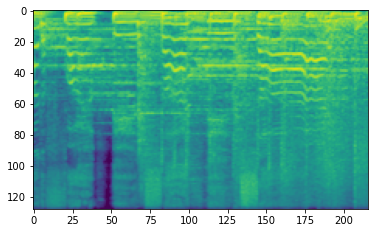

In [ ]:
import pafy 
from keras.models import load_model
from keras.preprocessing import image
import os
import csv
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
df = pd.read_json('data.json')
model=load_model('/content/gdrive/My Drive/music_mood_20210715_mobilenet(lr0.00001_400epoch).h5')
img_path=['output1.png','output2.png','output3.png']
mood=['aggressive','happy','romantic','sad']
output = []
k=0
# f = open("/content/gdrive/My Drive/output.csv", "w")
# f.truncate()
# f.close()
for index,row in df.iterrows():
    # if(k<189):
    #     k+=1
    #     continue
    k+=1
    if(k<=570):
      continue
    url=row['link']
    name="song.m4a"
    video = pafy.new(url)
    bestaudio = video.getbestaudio(preftype="m4a")
    bestaudio.download(name)    

    y,sr = librosa.load(name,offset=50,duration=5)
    mels = librosa.feature.melspectrogram(y=y,sr=sr)
    fig = plt.Figure()
    p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
    plt.savefig('output1.png')

    y,sr = librosa.load(name,offset=80,duration=5)
    mels = librosa.feature.melspectrogram(y=y,sr=sr)
    fig = plt.Figure()
    p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
    plt.savefig('output2.png')

    y,sr = librosa.load(name,offset=130,duration=5)
    mels = librosa.feature.melspectrogram(y=y,sr=sr)
    fig = plt.Figure()
    p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
    plt.savefig('output3.png')
    avg_pred=np.zeros((1,4),dtype=int)

    for path in img_path:
        img=image.load_img(path)
        img=img.resize((432,288))
        img_tensor = image.img_to_array(img)                    # (height, width, channels)
        img_tensor=img_tensor/255.
        img_tensor = np.expand_dims(img_tensor, axis=0)  
        pred=model.predict(img_tensor)
        for i in range(4):
          if(pred[0][i]>0.7):
            avg_pred[0][i]+=4
          elif(pred[0][i]>0.5):
            avg_pred[0][i]+=3
          elif(pred[0][i]>0.3):
            avg_pred[0][i]+=2
          elif(pred[0][i]>0.1):
            avg_pred[0][i]+=1
    print(row['song']+' '+mood[np.argmax(avg_pred)])
    with open('/content/gdrive/My Drive/output.csv', 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow([mood[np.argmax(avg_pred)]])
    os.remove(name)
    for path in img_path:
        os.remove(path)

In [ ]:
for g in moods:
  j = 0
  print(g)
  for filename in os.listdir(os.path.join('/content/gdrive/My Drive/Kaggle/Data/split/',f"{g}")):
    j = j+1
    if(j<497):
      continue
    song  =  os.path.join(f'/content/gdrive/My Drive/Kaggle/Data/split/{g}',f'{filename}')
    y,sr = librosa.load(song,duration=10)
    #print(sr)
    mels = librosa.feature.melspectrogram(y=y,sr=sr)
    fig = plt.Figure()
    canvas = FigureCanvas(fig)
    p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
    plt.savefig(f'/content/gdrive/My Drive/spectrograms10sec/train/{g}/{g+str(j)}.png')

In [ ]:
  j = 0
  g='serene_joy'
  print(g)
  for filename in os.listdir(os.path.join('/content/gdrive/My Drive/Kaggle/Data/split/',f"{g}")):
    song  =  os.path.join(f'/content/gdrive/My Drive/Kaggle/Data/split/{g}',f'{filename}')
    j = j+1
    if(j<477):
      continue
    y,sr = librosa.load(song,duration=10)
    #print(sr)
    mels = librosa.feature.melspectrogram(y=y,sr=sr)
    fig = plt.Figure()
    # canvas = FigureCanvas(fig)
    p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
    plt.savefig(f'/content/gdrive/My Drive/spectrograms10sec/train/{g}/{g+str(j)}.png')
    #os.remove(song)

In [ ]:
directory = "/content/gdrive/My Drive/spectrograms10sec/train/"
for g in moods:
  filenames = os.listdir(os.path.join(directory,f"{g}"))
  random.shuffle(filenames)
  test_files = filenames[0:100]

  for f in test_files:

    shutil.move(directory + f"{g}"+ "/" + f,"/content/gdrive/My Drive/spectrograms10sec/test/" + f"{g}")


In [ ]:
train_path='/content/gdrive/My Drive/spectrograms5sec/train'
test_path='/content/gdrive/My Drive/spectrograms5sec/test'
traind= ImageDataGenerator(rescale=1/255.).flow_from_directory(train_path, target_size=(288,432) ,classes=['aggressive','happy','romantic','sad'], batch_size=32)
testd= ImageDataGenerator(rescale=1/255.).flow_from_directory(test_path,target_size=(288,432) ,classes=['aggressive','happy','romantic','sad'], batch_size=32)

img_input = Input(shape=(288,432,3))

x = Conv2D(64,(3,3),activation='relu',padding='same')(img_input)
x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), strides=(2,2))(x)

x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)     
x = MaxPooling2D((2,2), strides=(2,2))(x)

x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)     

x = GlobalAveragePooling2D()(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4,activation='softmax')(x)
model = Model(img_input,x)
adam = Adam(learning_rate=0.01)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/music_mood_20210712_me.h5', monitor='val_loss', save_best_only=True)
model.summary()
model.fit(traind, steps_per_epoch=8, validation_data=testd, validation_steps=8, epochs=100, verbose=1, callbacks=[checkpoint])

In [ ]:
train_path='/content/gdrive/My Drive/spectrograms5sec/train'
test_path='/content/gdrive/My Drive/spectrograms5sec/test'
traind= ImageDataGenerator(rescale=1/255.).flow_from_directory(train_path, target_size=(288,432) ,classes=['aggressive','happy','romantic','sad'], batch_size=32)
testd= ImageDataGenerator(rescale=1/255.).flow_from_directory(test_path,target_size=(288,432) ,classes=['aggressive','happy','romantic','sad'], batch_size=32)

img_input = Input(shape=(288,432,3))

x = Conv2D(8,(3,3),activation='relu',padding='same')(img_input)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), strides=(2,2))(x)

x = Conv2D(16,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)     
x = MaxPooling2D((2,2), strides=(2,2))(x)

x = Conv2D(32,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)     
x = MaxPooling2D((2,2), strides=(2,2))(x)

x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)     
x = MaxPooling2D((2,2), strides=(2,2))(x)

x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)     
x = MaxPooling2D((2,2), strides=(2,2))(x)

x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)     
x = MaxPooling2D((2,2), strides=(2,2))(x)

x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(4,activation='softmax')(x)
model = Model(img_input,x)
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/music_mood_20210713_tds(lr0.001_300epoch).h5', monitor='val_loss', save_best_only=True)
model.summary()
model.fit(traind, steps_per_epoch=8, validation_data=testd, validation_steps=8, epochs=300, verbose=1, callbacks=[checkpoint])

In [ ]:
from keras.callbacks import ModelCheckpoint,TensorBoard
train_path='/content/gdrive/My Drive/spectrograms10sec/train'
test_path='/content/gdrive/My Drive/spectrograms10sec/test'
traind= ImageDataGenerator(rescale=1/255.).flow_from_directory(train_path, target_size=(130,370) ,classes=moods, batch_size=16)
testd= ImageDataGenerator(rescale=1/255.).flow_from_directory(test_path,target_size=(130,370) ,classes=moods, batch_size=16)

img_input = Input(shape=(130,370,3))

# x = Conv2D(8,(3,3),activation='relu',padding='same')(img_input)
# x = BatchNormalization()(x)
# x = MaxPooling2D((2,2), strides=(2,2))(x)

x = Conv2D(16,(3,3),activation='relu',padding='same')(img_input)
x = BatchNormalization()(x)     
x = MaxPooling2D((2,2), strides=(2,2))(x)

x = Conv2D(32,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)     
x = MaxPooling2D((2,2), strides=(2,2))(x)

x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)     
x = MaxPooling2D((2,2), strides=(2,2))(x)

x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)     
x = MaxPooling2D((2,2), strides=(2,2))(x)

# x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
# x = BatchNormalization()(x)     
# x = MaxPooling2D((2,2), strides=(2,2))(x)

x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(4,activation='softmax')(x)
model = Model(img_input,x)
adam = Adam(learning_rate=0.000001)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
log_dir = "logs/fit"
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/music_mood_20210714_quar(lr0.000001_conv16_400epoch).h5', monitor='val_loss', save_best_only=True)
tbCallBack = TensorBoard(log_dir=log_dir, histogram_freq=0, write_graph=True, write_images=True)
%load_ext tensorboard
%tensorboard --logdir logs/fit
model.summary()
model.fit(traind, steps_per_epoch=8, validation_data=testd, validation_steps=8, epochs=400, verbose=1, callbacks=[checkpoint,tbCallBack])

In [ ]:
from keras.applications.nasnet import NASNetMobile

from keras.callbacks import ModelCheckpoint,TensorBoard
train_path='/content/gdrive/My Drive/spectrograms10sec/train'
test_path='/content/gdrive/My Drive/spectrograms10sec/test'
traind= ImageDataGenerator(rescale=1/255.).flow_from_directory(train_path, target_size=(130,370) ,classes=moods, batch_size=10)
testd= ImageDataGenerator(rescale=1/255.).flow_from_directory(test_path,target_size=(130,370) ,classes=moods, batch_size=10)

input_tensor = Input(shape=(130, 370, 3))
nasnetm= NASNetMobile(weights='imagenet', include_top=False, input_tensor = input_tensor)
x = GlobalAveragePooling2D()(nasnetm.output)
x = Dense(1056,activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4,activation='softmax')(x)

model = Model(nasnetm.input, x)
model.summary()

log_dir = "logs/fit"
adam = Adam(lr=0.001)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/music_mood_20210715_quar_nasnet(lr0.001_batch16_300epoch).h5', monitor='val_loss', save_best_only=True)
tbCallBack = TensorBoard(log_dir=log_dir, histogram_freq=0, write_graph=True, write_images=True)
%load_ext tensorboard
%tensorboard --logdir logs/fit
model.summary()
model.fit(traind, steps_per_epoch=8, validation_data=testd, validation_steps=8, epochs=300, verbose=1, callbacks=[checkpoint,tbCallBack])

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2

from keras.callbacks import ModelCheckpoint,TensorBoard
train_path='/content/gdrive/My Drive/spectrograms5sec/train'
test_path='/content/gdrive/My Drive/spectrograms5sec/test'
traind= ImageDataGenerator(rescale=1/255.).flow_from_directory(train_path, target_size=(288,432) ,classes=moods, batch_size=16)
testd= ImageDataGenerator(rescale=1/255.).flow_from_directory(test_path,target_size=(288,432) ,classes=moods, batch_size=16)

input_tensor = Input(shape=(288,432, 3))
mobile= MobileNetV2(weights='imagenet', include_top=False, input_tensor = input_tensor)
x = GlobalAveragePooling2D()(mobile.output)
x = Dense(1280,activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4,activation='softmax')(x)

model = Model(mobile.input, x)
model.summary()

log_dir = "logs/fit"
adam = Adam(lr=0.00001)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/music_mood_20210715_mobilenet(lr0.00001_400epoch).h5', monitor='val_loss', save_best_only=True)
tbCallBack = TensorBoard(log_dir=log_dir, histogram_freq=0, write_graph=True, write_images=True)
%load_ext tensorboard
%tensorboard --logdir logs/fit
model.summary()
model.fit(traind, steps_per_epoch=8, validation_data=testd, validation_steps=8, epochs=400, verbose=1, callbacks=[checkpoint,tbCallBack])

In [ ]:
from keras.applications.nasnet import NASNetMobile

from keras.callbacks import ModelCheckpoint,TensorBoard
train_path='/content/gdrive/My Drive/spectrograms10sec/train'
test_path='/content/gdrive/My Drive/spectrograms10sec/test'
traind= ImageDataGenerator(rescale=1/255.).flow_from_directory(train_path, target_size=(130,370) ,classes=moods, batch_size=16)
testd= ImageDataGenerator(rescale=1/255.).flow_from_directory(test_path,target_size=(130,370) ,classes=moods, batch_size=16)

input_tensor = Input(shape=(130, 370, 3))
nasnetm= NASNetMobile(weights='imagenet', include_top=False, input_tensor = input_tensor)
x = GlobalAveragePooling2D()(nasnetm.output)
x = Dense(1056,activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4,activation='softmax')(x)

model = Model(nasnetm.input, x)
model.summary()

log_dir = "logs/fit"
adam = Adam(lr=1e-5)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/music_mood_20210714_quar_nasnet(300epoch).h5', monitor='val_loss', save_best_only=True)
tbCallBack = TensorBoard(log_dir=log_dir, histogram_freq=0, write_graph=True, write_images=True)
%load_ext tensorboard
%tensorboard --logdir logs/fit
model.summary()
model.fit(traind, steps_per_epoch=8, validation_data=testd, validation_steps=8, epochs=300, verbose=1, callbacks=[checkpoint,tbCallBack])

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

In [ ]:
y=85
h=130
x=25
w=370
for g in moods:
  print(g)
  for filename in os.listdir(os.path.join('/content/gdrive/My Drive/spectrograms10sec/test/',f"{g}")):
    img_path  =  os.path.join(f'/content/gdrive/My Drive/spectrograms10sec/test/{g}',f'{filename}')
    img = cv2.imread(img_path)
    crop_img = img[y:y+h, x:x+w]
    cv2.imwrite(img_path,crop_img)


In [ ]:
import librosa.display
y,sr = librosa.load('九澤CP【陪在你身邊 By Your Side】Official Music Video.webm',offset=80,duration=10)
mels = librosa.feature.melspectrogram(y=y,sr=sr)
fig = plt.Figure()
canvas = FigureCanvas(fig)
p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
plt.savefig('/content/gdrive/My Drive/CP_by_your_side.png')

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
model=load_model("/content/gdrive/My Drive/music_mood_20210712_tds(lr0.001_200epoch_valloss=0.5626).h5")
img_path='/content/gdrive/My Drive/CP_by_your_side.png'
img=image.load_img(img_path)
img_tensor = image.img_to_array(img)                    # (height, width, channels)
img_tensor=img_tensor/255.
img_tensor = np.expand_dims(img_tensor, axis=0)  
pred=model.predict(img_tensor)
print(pred)
print(moods[np.argmax(pred)])

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

In [ ]:
folder = '/content/gdrive/My Drive/spectrograms5sec/'
!(cd '{folder}' && zip -r -q test.zip test)

In [ ]:
from google.colab import files
uploaded = files.upload()
!unzip -q train.zip

In [ ]:
from google.colab import files
uploaded = files.upload()